# LAB 3:
### LÀM SẠCH DỮ LIỆU CƠ BẢN
Nội dung: Xử lý dữ liệu y khoa về huyết áp của bệnh nhân

Mục tiêu: Sinh viên biết cách sử dụng gói Pandas để xử lý dữ liệu


1. Tiến hành hiểu dữ liệu từ chuyên gia
―The data set has been kept small enough for you to be able to grok it all at once. The 
data is in csv format. Each row in the dataset has data about different individuals and 
their heart rate details for different time intervals. The columns contain information such 
as individual’s Age, Weight, Sex and Heart Rates taken at different time intervals.‖
2. Thông thường ta thường xử lý các vấn đề sau về dữ liệu
    1. Thiếu dòng tiêu đề ở file csv
    2. Nhiều biến lưu ở một cột
    3. Dữ liệu cột chứa các giá trị đơn vị không nhất quán
    4. Dữ liệu có một dòng trống
    5. Dữ liệu có các dòng trùng lặp
    6. Các ký tự không phải ASCII
    7. Giá trị bị mất
    8. Tiêu đề cột là giá trị chứ không phải tên biến
3. Vấn đề 1: Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề 
―Missing header in the csv file‖


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [112]:
columns_name = ['ID','name','Age','Weight','m0006', "m0612","m1218", "f006", "f0612", "f1218"]
df = pd.read_csv('patient_heart_rate.csv', names = columns_name)

In [113]:
df.head()

,ID,name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75


In [114]:
#1 Phước nè
#2. Nhiều biến lưu ở một cột
df[['FirstName','LastName']] = df['name'].str.split(expand=True)
df.head()

,ID,name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [115]:
# delete column name
del df['name']
df.head()

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [116]:
# Dữ liệu cột chứa các giá trị đơn vị không nhất quán
weight = df['Weight']
for i in range(len(weight)):
    x = str(weight[i])
    if 'lbs' == x[-3:]:
        y = str(int(float(x[:-3:])/2.205)) + "kgs"
        weight[i] = y
weight

<ipython-input-116-9f7f9b37b457>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y


0     70kgs
1     70kgs
2       NaN
3     78kgs
4     90kgs
5     85kgs
6     56kgs
7     78kgs
8       NaN
9       NaN
10    85kgs
11    45kgs
12    60kgs
13      NaN
14      NaN
15      NaN
16    81kgs
Name: Weight, dtype: object

In [117]:
df.head(5)

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


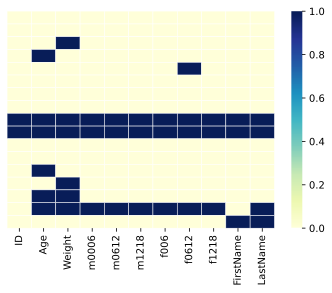

In [118]:
# D.Dữ liệu có một dòng trống
sns.heatmap(df.isna(),  yticklabels=False,cbar = True, cmap = 'YlGnBu', linewidths= 0.5)

In [119]:
df.dropna(how= 'all', inplace =True)

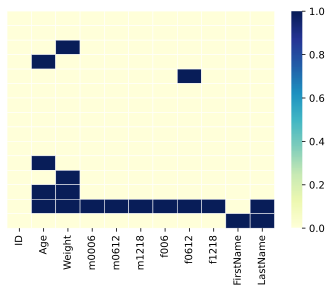

In [120]:
sns.heatmap(df.isna(),  yticklabels=False,cbar = True, cmap = 'YlGnBu', linewidths= 0.5)

In [121]:
df.drop_duplicates(subset=['FirstName','LastName', 'Age', 'Weight'], inplace =True)
df

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


### 8. Vấn đề 6: Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. 
Giải pháp: Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác 
hoặc thay bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‗warning‘

In [122]:
df.FirstName.replace({r'[^\x00-\x7F]+' :''}, regex =True, inplace =True)
df.head()

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


In [123]:
df.LastName.replace({r'[^\x00-\x7F]+' :''}, regex =True, inplace =True)
df.head()

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


### 9. Vấn đề 7: ―Missing values‖, vấn đề này xảy ra tại các cột ―Age‖, ―Weight‖ và ―Heart 
Rate‖. Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ 
liệu do nhiều nguyên nhân chủ quan lẫn khách quan.Có một vài giải pháp để xử lý vấn đề 
này, chủ yếu dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa 
đề xuất từ chuyên gia như sau:

a. Deletion: Remove records with missing values

b. Dummy substitution: Replace missing values with a dummy but valid value: 
e.g.: 0 for numerical values.

c. Mean substitution: Replace the missing values with the mean.

d. Frequent substitution: Replace the missing values with the most frequent item.

e. Improve the data collector: Your business folk will talk to the clients and inform 
them about why it is worth fixing the problem with the data collector

Yêu cầu:
- Thống kê thông tin dữ liệu thiếu trên từng biến Age và Weight 

- Yêu cầu xử lý dữ liệu thiếu như sau: Nếu dòng nào có Age hoặc Weight có dữ liệu thì 
phần Age hoặc Weight được tính như bên dưới, nếu thiếu cả 2 thông tin thì xóa dòng

o Age: Giá trị thay thế là mean của các giá trị trong cột Age

o Weight: Giá trị thay thế là mean của các giá trị trong cột Weight theo nhóm 
giới tính.

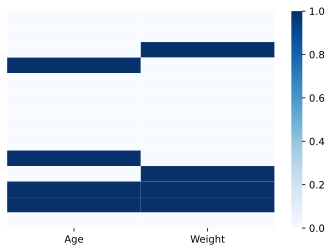

In [124]:
# Thống kê thông tin dữ liệu thiếu trên từng biến Age và Weight
sns.heatmap(df[['Age','Weight']].isna(), cmap = 'Blues', yticklabels= False)

In [125]:
#Yêu cầu xử lý dữ liệu thiếu như sau: Nếu dòng nào có Age hoặc Weight có dữ liệu thì phần Age hoặc Weight được tính như bên dưới, nếu thiếu cả 2 thông tin thì xóa dòng
df.drop(df[df.Age.isna() & df.Weight.isna()].index, inplace = True)
df

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


In [126]:
df['Age'].fillna(df['Age'].mean(), inplace =True)
#df['Weight'].fillna(df['Weight'].mean(), inplace =True)
df

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,FirstName,LastName
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,36.1,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,36.1,60kgs,78,75,72,-,-,-,Henry,Nam


### 10. Vấn đề 8: ―một cột chứa quá nhiều thông tin cần được phân rã‖, như trong bài toán này ta 
thấy header ―m0006‖ chứa các nội dung bao gồm: m  male, 1218 ~ 12-18 (mm-dd). 
Còn giá trị thì là kết quả huyết áp.

In [127]:
# Phước nè
df1 = pd.melt(df, id_vars= ['ID','Age','Weight','FirstName','LastName'], value_name= 'PulseRate', var_name= 'Sex_Time').sort_values(['ID','Age','Weight','FirstName','LastName'])

In [128]:
df1

,ID,Age,Weight,FirstName,LastName,Sex_Time,PulseRate
0,1.0,56.0,70kgs,Micky,Mous,m0006,72
12,1.0,56.0,70kgs,Micky,Mous,m0612,69
24,1.0,56.0,70kgs,Micky,Mous,m1218,71
36,1.0,56.0,70kgs,Micky,Mous,f006,-
48,1.0,56.0,70kgs,Micky,Mous,f0612,-
...,...,...,...,...,...,...,...
23,15.0,52.0,81kgs,NaN,NaN,m0612,-
35,15.0,52.0,81kgs,NaN,NaN,m1218,-
47,15.0,52.0,81kgs,NaN,NaN,f006,68
59,15.0,52.0,81kgs,NaN,NaN,f0612,75


In [129]:
#Extract sex, hour lower bound and hour upper dound group
tmp_df= df1["Sex_Time"].str.extract("(\D)(\d+)(\d{2})", expand=True)
#Name columns
tmp_df.columns=["Sex","hours_lower","hours_upper"]
#Create Time column based on "hours_lower" and "hours_upper" columns
tmp_df["Time"]=tmp_df["hours_lower"] + "-"+ tmp_df["hours_upper"]
#Merge
df1 =pd.concat([df1, tmp_df], axis=1)
df1.head()

,ID,Age,Weight,FirstName,LastName,Sex_Time,PulseRate,Sex,hours_lower,hours_upper,Time
0,1.0,56.0,70kgs,Micky,Mous,m0006,72,m,00,06,00-06
12,1.0,56.0,70kgs,Micky,Mous,m0612,69,m,06,12,06-12
24,1.0,56.0,70kgs,Micky,Mous,m1218,71,m,12,18,12-18
36,1.0,56.0,70kgs,Micky,Mous,f006,-,f,0,06,0-06
48,1.0,56.0,70kgs,Micky,Mous,f0612,-,f,06,12,06-12


In [133]:
df1.drop(['Sex_Time','hours_lower','hours_upper'], axis = 1, inplace = True)
df1 = df1.dropna()
# df1.head()
len(df1.PulseRate)

53

In [150]:
df1

,ID,Age,Weight,FirstName,LastName,PulseRate,Sex,Time
0,1.0,56.0,70kgs,Micky,Mous,72,m,00-06
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18
36,1.0,56.0,70kgs,Micky,Mous,0,f,0-06
48,1.0,56.0,70kgs,Micky,Mous,0,f,06-12
60,1.0,56.0,70kgs,Micky,Mous,0,f,12-18
1,2.0,34.0,70kgs,Donald,Duck,0,m,00-06
13,2.0,34.0,70kgs,Donald,Duck,0,m,06-12
25,2.0,34.0,70kgs,Donald,Duck,0,m,12-18
37,2.0,34.0,70kgs,Donald,Duck,85,f,0-06


In [ ]:
df1.to_csv("patient_heart_rate_clean.csv", index = False)